In [32]:
import cv2
import numpy as np
from src.Receiver import Receiver
from scipy.io import wavfile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Funciones para calculo de errores

In [2]:
def bit_error_rate(true_bits, bits):
    error_count = 0
    for true_bit, bit in zip(true_bits, bits):
        if true_bit != bit:
            error_count += 1
    error_rate = error_count / len(true_bits)
    correct_rate = 1 - error_rate
    print('Porcentaje bits correctos:', round(correct_rate*100, 4), '% correctos')
    print('Porcentaje bits incorrectos:', round(error_rate*100, 4), '% incorrectos')

In [16]:
def load_text_bits(path):
    try:
        with open(path, 'r', encoding='utf-8') as f:
            text = f.read()
    except:
        text = path
    ascii_list = [ord(ch) for ch in text]

    bits = np.array([format(i, '08b') for i in ascii_list])
    bitList = [int(item) for sublist in bits for item in sublist]
    return np.array(bitList)


In [4]:
def load_image_bits_send(path):
    try:
        img = cv2.imread(path)
    except:
        img = path
    b = img[:,:,2]
    g = img[:,:,1]
    r = img[:,:,0]
    r = r.flatten()
    r_binary = np.array([format(i, '08b') for i in r])
    g = g.flatten()
    g_binary = np.array([format(i, '08b') for i in g])
    b = b.flatten()
    b_binary = np.array([format(i, '08b') for i in b])
    bitListred = [int(item) for sublist in r_binary for item in sublist]
    bitListgreen = [int(item) for sublist in g_binary for item in sublist]
    bitListblue = [int(item) for sublist in b_binary for item in sublist]
    return np.concatenate([bitListblue, bitListgreen, bitListred])

In [5]:
def load_image_bits(path):
    try:
        img = cv2.imread(path)
    except:
        img = path
    b = img[:,:,0]
    g = img[:,:,1]
    r = img[:,:,2]
    r = r.flatten()
    r_binary = np.array([format(i, '08b') for i in r])
    g = g.flatten()
    g_binary = np.array([format(i, '08b') for i in g])
    b = b.flatten()
    b_binary = np.array([format(i, '08b') for i in b])
    bitListred = [int(item) for sublist in r_binary for item in sublist]
    bitListgreen = [int(item) for sublist in g_binary for item in sublist]
    bitListblue = [int(item) for sublist in b_binary for item in sublist]
    return np.concatenate([bitListblue, bitListgreen, bitListred])

## Audio Grabado

In [17]:
true_bits_image_1 = load_image_bits('data/1_20_Imagen1.png')
true_bits_text_1 = load_text_bits('data/text.txt')
all_true_bits_1 = np.concatenate([true_bits_image_1,true_bits_text_1])

true_bits_text_2 = load_text_bits('data/text2.txt')
true_bits_image_2 = load_image_bits('data/1_14_Imagen2.png')
all_true_bits_2 = np.concatenate([true_bits_image_2,true_bits_text_2])

In [7]:
receiver1_g = Receiver(1000, 3000, 20)
receiver2_g = Receiver(4000, 6000, 14)

In [8]:
audio_g = wavfile.read("audios/mejor_audio.wav")[1]
bits1_g = receiver1_g.decode_audio(audio_g)
bits2_g = receiver2_g.decode_audio(audio_g)

img1_g = bits1_g[0]
text1_g = bits1_g[1]
img2_g = bits2_g[0]
text2_g = bits2_g[1]

In [9]:
received_bits_image_1_g = load_image_bits_send(bits1_g[0])
received_bits_text_1_g = load_text_bits(bits1_g[1])
received_bits_image_2_g = load_image_bits_send(bits2_g[0])
received_bits_text_2_g = load_text_bits(bits2_g[1])
all_bits_received_1_g = np.concatenate([received_bits_image_1_g,received_bits_text_1_g])
all_bits_received_2_g = np.concatenate([received_bits_image_2_g,received_bits_text_2_g])

### Imágenes original

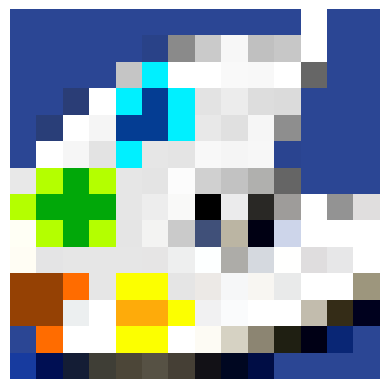

In [38]:
# img = mpimg.imread('data/1_20_Imagen1.png')
img = mpimg.imread('data/1_14_Imagen2.png')
plt.imshow(img)
plt.axis('off')
plt.show()

### Primera Imagen

¡Laboratorio de Tecnologías de Información y de Comunicación EL5207! Transmisor número 1, primavera 202ÒÒ


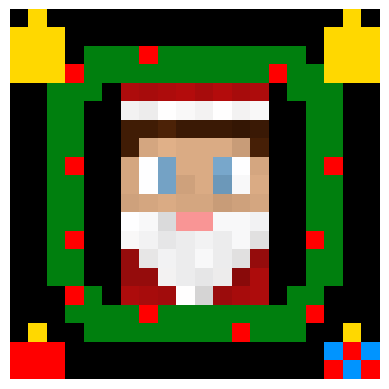

In [39]:
plt.imshow(img1_g)
plt.axis('off')
print(text1_g)

In [21]:
bit_error_rate(received_bits_image_1_g,true_bits_image_1)

Porcentaje bits correctos: 100.0 % correctos
Porcentaje bits incorrectos: 0.0 % incorrectos


In [22]:
bit_error_rate(received_bits_text_1_g,true_bits_text_1)

Porcentaje bits correctos: 98.8095 % correctos
Porcentaje bits incorrectos: 1.1905 % incorrectos


In [23]:
bit_error_rate(all_bits_received_1_g,all_true_bits_1)


Porcentaje bits correctos: 99.9042 % correctos
Porcentaje bits incorrectos: 0.0958 % incorrectos


### Segunda Imagen

¡Laboratorio de Tecnologías de Información y de Comunicación EL5207! Transmisor número 2, primavera 20:r


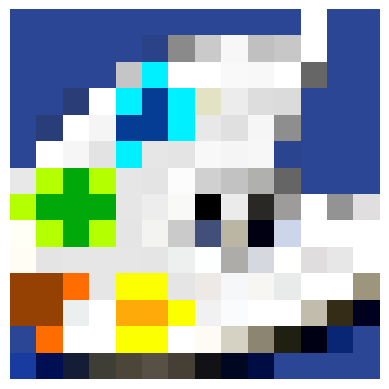

In [24]:
plt.imshow(img2_g)
plt.axis('off')
print(text2_g)

In [25]:
bit_error_rate(received_bits_image_2_g,true_bits_image_2)

Porcentaje bits correctos: 99.9787 % correctos
Porcentaje bits incorrectos: 0.0213 % incorrectos


In [26]:
bit_error_rate(received_bits_text_2_g,true_bits_text_2)

Porcentaje bits correctos: 98.9286 % correctos
Porcentaje bits incorrectos: 1.0714 % incorrectos


In [27]:
bit_error_rate(all_bits_received_2_g,all_true_bits_2)

Porcentaje bits correctos: 99.8196 % correctos
Porcentaje bits incorrectos: 0.1804 % incorrectos
